In [5]:
%matplotlib inline

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
    'figure.figsize'      : (15,15),
    'font.size'           : 20.0,
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'medium',
    'xtick.labelsize'     : 'medium',
    'ytick.labelsize'     : 'medium',
    'legend.fontsize'     : 'large',
    'legend.loc'          : 'upper right'
})

In [28]:
df = pd.read_csv('PIRUS.csv',na_values=['-99'])

In [36]:
cols = ['Subject_ID','Current_Status','Clique_Connect','Prison_Radicalize','Diaspora_Ties','Aspirations','Standing']
lst = [df.columns.get_loc(col) for col in cols]
catagories = ['Management and Identification Variables','Plot and Consequences', 'Group Nature', 'Radicalization', \
              'Demographics', 'Socioeconomic Status', 'Personal']
start = 0
for chunk,name in zip(lst,catagories):
    col = df.iloc[:,start:chunk+1].info()
    start = chunk + 1
    print(name,'\n',col,'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 1 columns):
Subject_ID    1865 non-null int64
dtypes: int64(1)
memory usage: 14.6 KB
Management and Identification Variables 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865 entries, 0 to 1864
Data columns (total 19 columns):
Loc_Plot_State1       1839 non-null object
Loc_Plot_City1        1579 non-null object
Loc_Plot_State2       247 non-null object
Loc_Plot_City2        179 non-null object
Date_Exposure         1865 non-null object
Plot_Target1          1832 non-null float64
Plot_Target2          229 non-null float64
Plot_Target3          84 non-null float64
Attack_Preparation    1667 non-null float64
Op_Security           1460 non-null float64
Changing_Target       1516 non-null float64
Anticp_Fatals_Targ    1640 non-null float64
Internet_Use_Plot     1555 non-null float64
Extent_Plot           1838 non-null float64
Violent               1865 non-null int64
Criminal_Severity

In [30]:
df.Violent.unique()

array([1, 0], dtype=int64)

In [31]:
df.Loc_Plot_State1.unique()

array(['Illinois', 'Afghanistan', 'California', 'New York', 'Virginia',
       'Ohio', 'Georgia', 'Florida', 'New Jersey', 'Texas', 'Pakistan',
       'Washington', 'Oregon', 'Arizona', 'Massachusetts', 'Somalia',
       'Maryland', 'Michigan', 'Minnesota', 'North Carolina',
       'Pennsylvania', 'District of Columbia', 'Colorado', 'Arkansas',
       'Alaska', 'Alabama', 'Wyoming', 'Missouri', nan, 'Wisconsin',
       'Utah', 'Montana', 'Tennessee', 'Oklahoma', 'Kansas',
       'New Hampshire', 'Louisiana', 'North Dakota', 'Vermont',
       'Mississippi', 'Indiana', 'Delaware', 'Kentucky', 'Nevada', 'Iowa',
       'West Virginia', 'South Carolina', 'Idaho', 'Nebraska', 'Mexico',
       'Connecticut', 'New Mexico', 'Canada', 'South Dakota', 'Maine',
       'Germany', 'Puerto Rico', 'Dominica', 'Libya', 'Iraq', 'Egypt',
       'Kenya', 'Rhode Island', 'Syria', 'Tunisia'], dtype=object)

In [41]:
df[df.Gender==1].Gender.count()

182

In [33]:
lst

[0, 19, 34, 75, 94, 105, 144]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8C5E0A710>,
      dtype=object)

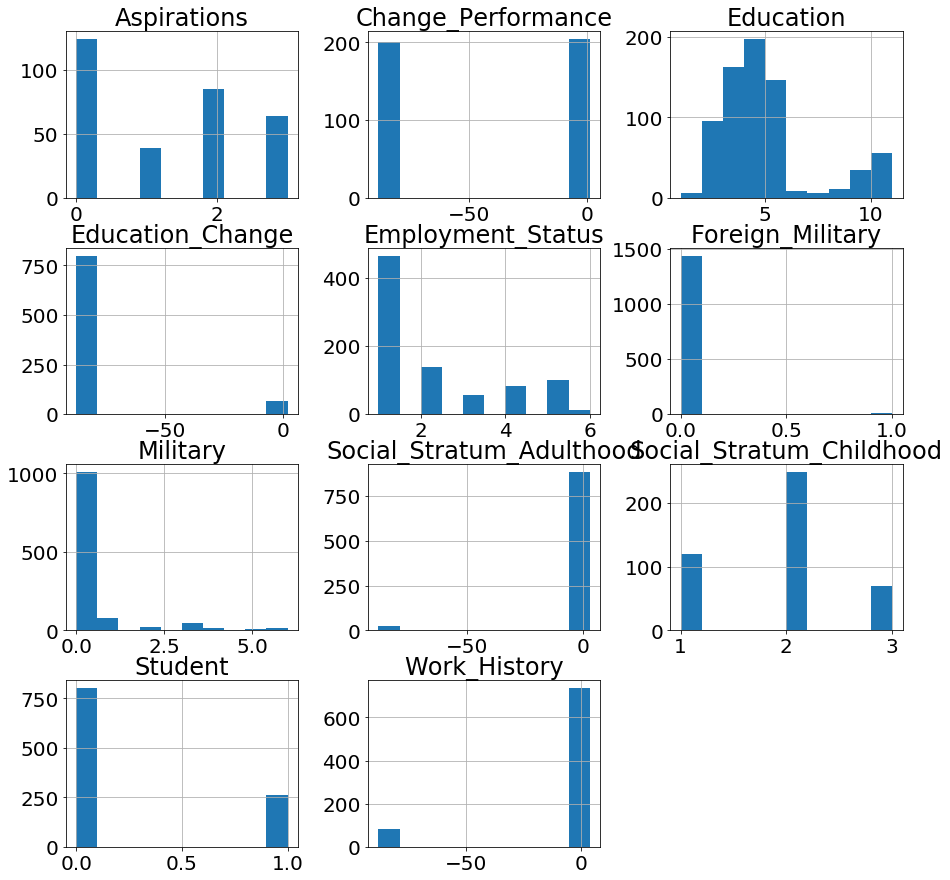

In [42]:
df.iloc[:,95:106].hist()